# Predicting Log Error for Zillow

by David Schneemann

## Project Goal

My goal with this project is to identify Zillow's key drivers of logerror and to provide insight into why and how these factors are producing certain log errors. With this information and the following recommendations, our organization can work together to improve business processes and procedures in order to more accurately predict home values and log error moving forward.

## Project Description

At Zillow, the ability to predict logerror is essential for measuring the error of a home value prediction within this database.

In order to more accurately predict log error, we will analyze the attributes (features) of homes within a predetermined set of data. This dataset includes Single Family Properties that had a transaction during 2017.
We will then develop models for predicting log error based on these attributes and provide recommendations and predictions to Zillow for improving prediction of log error moving forward.


-----------------------------------------------------------------------------------------------------------
## Initial Questions

#### 1. Does a higher number of bedrooms increase logerror?

#### 2. Does a higher number of bathrooms increase logerror?

#### 3. Do more garage spaces increase logerror?

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### 5. Does a higher square footage increase home value?

-----------------------------------------------------------------------------------------------------------
## Clustering Questions

#### 1. Does bedroom, bathroom, and garage space count affect log error?

#### 2.  Does location, latitude, and longitude affect log error?
    
#### 3. Do sqft, lot_sq_ft, and bath_bed_ratio affect log error?

-----------------------------------------------------------------------------------------------------------
## Data Dictionary

In order to effectively meet our goals, the following module imports are required. \
Below is an extensive list of all modules I imported and used to create and complete the desired analysis for Zillow.

In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

# Personal Imports
import acquire
import prepare
import explore
import model

| Variable      | Meaning |
| ----------- | ----------- |
| logerror      | The measured log error of a home       |
| home_value      | The total tax assessed value of the parcel       |
| bedrooms   | The total number of bedrooms in a home        |
| bathrooms      | The total number of bathrooms in a home       |
| garage_spaces      | The total number of car slots in a garage       |
| year_built      | The year the home was built       |
| age      | The age of the home       |
| location      | Location of a home by county      |
| sq_ft      | The total square feet of a home       |
| lot_sq_ft      | The total square feet of a property lot       |
| latitude   | Location using the latitudenal metric        |
| longitude      | Location using the longitudenal metric       |
| bath_bed_ratio      | Ratio of bathrooms to bedrooms of a home       |

## Acquire Zillow Data

##### We acquire our data by utilizing my acquire.py file.
This file pulls my selected features from properties_2017 and joins them with propertylandusetype and predictions_2017. \
We use these tables only to limit our selection to Single Family Residences with a transaction in 2017. \
Our resulting sql query returns 56,079 entries of data with the following attributes.

In [2]:
# Calling my acquire.py file and utilizing its function,assigning the output to df
df = acquire.wrangle_zillow()

## Prepare Zillow Data

##### We prepare our data by utilizing my prepare.py file.
This file:
- Handles null values
    - These null values represented less than 1% of our data, so I chose to drop these rows
- Converts some variables to integers for optimization
- Handles outliers
- Cleans variables, including dropping `taxamount` and the duplicate `id`, along with renaming columns
- Includes feature engineering to encode location via `fips`
- Splits prepared df into train, validate, test 
    - Splitting the associated dfs on x and y will occur later after clustering

Our resulting dataframes are ready for exploration and evaluation.

In [3]:
# Calling my prepare function and assigning the output to the following variables
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [4]:
# Checking shape on our samples to confirm appropriate split
print('Total df shape: {}.'.format(df.shape))
print('Train shape: {}.'.format(train.shape))
print('Validate shape: {}.'.format(validate.shape))
print('Test shape: {}.'.format(test.shape))

Total df shape: (48250, 32).
Train shape: (27020, 32).
Validate shape: (11580, 32).
Test shape: (9650, 32).


## Set the Data Context

#### Note: Not all visuals, analysis, and work is shown within this Final Report. 
#### All my work, from start to finish, is available in my `working_notebook.ipynb` file for your reference.

Our acquired and prepared dataset contains information for 48,250 homes. \
    In the process of exploring this data and setting initial hypotheses, I created a figure plotting choice categorical variables with our target variable of `logerror`. Using this figure I determined potential correlation with each of the features stated in my initial hypotheses. The following exploration seeks to answer these questions.

-----------------------------------------------------------------------------------------------------------
## Exploratory Analysis
I now take each of my initial hypotheses in turn, answering them using visualizations and statistical analysis. \
I utilize an `explore.py` file in order to abstract repetitive code away from this Final Report. 

#### 1. Does a higher number of bedrooms increase logerror?

- Ho = More bedrooms translates to <= logerror
- Ha = More bedrooms translates to > logerror

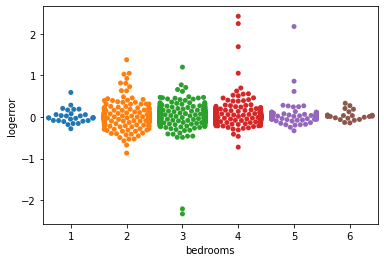

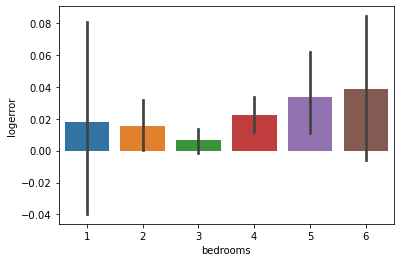

In [5]:
# Calling explore.py; applying plot function to 'bedrooms' and 'logerror'
explore.plot_categorical_and_continuous_vars(df, 'bedrooms', 'logerror')

In [6]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bed , p_bed = pearsonr(x = train['bedrooms'], y = train['logerror'])

r_bed , p_bed

if p_bed < alpha:
    print('The number of bedrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with logerror.')

The number of bedrooms is correlated with logerror.
The correlation coefficient is 0.038875245230531076.


#### Answer 1 : Yes,  higher numbers of bedrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bedrooms results in a higher logerror. Thus we move forward with this feature.

#### 2. Does a higher number of bathrooms increase logerror?

- Ho = More bathrooms translates to <= logerror
- Ha = More bathrooms translates to > logerror

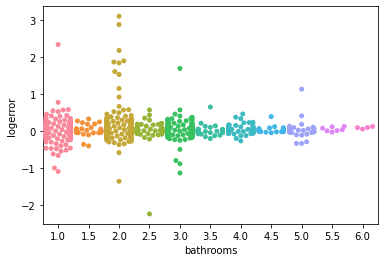

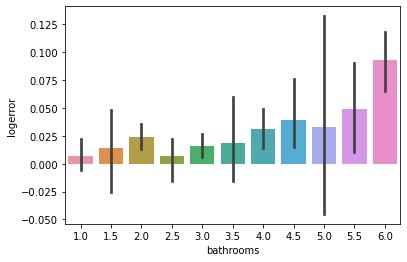

In [7]:
# Calling explore.py; applying plot function to 'bathrooms' and 'logerror'
explore.plot_categorical_and_continuous_vars(train, 'bathrooms', 'logerror')

In [8]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bath , p_bath = pearsonr(x = train['bathrooms'], y = train['logerror'])

r_bath , p_bath

if p_bath < alpha:
    print('The number of bathrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with logerror.')

The number of bathrooms is correlated with logerror.
The correlation coefficient is 0.0352820776149596.


#### Answer 2: Yes,  higher numbers of bathrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bathrooms results in a higher logerror. Thus we move forward with this feature.

#### 3. Do more garage spaces increase logerror?

- Ho = More garage spaces translates to <= logerror
- Ha = More garage spaces translates to > logerror

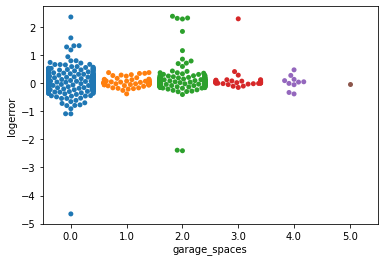

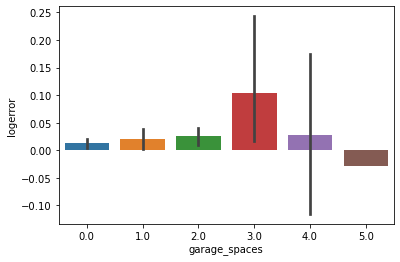

In [9]:
# Calling explore.py; applying plot function to 'garage_spaces' and 'logerror'
explore.plot_categorical_and_continuous_vars(train, 'garage_spaces', 'logerror')

In [10]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_garage , p_garage = pearsonr(x = train['garage_spaces'], y = train['logerror'])

r_garage , p_garage

if p_garage < alpha:
    print('The number of garage spaces is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_garage))
else:
    print('The number of garage spaces is NOT correlated with logerror.')

The number of garage spaces is correlated with logerror.
The correlation coefficient is 0.021635652375575822.


#### Answer 3: Yes, higher numbers of garage spaces correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more garage spaces results in a higher logerror. Thus we move forward with this feature.

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Ho = Population Means of the logerrors for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the logerrors for Orange county, LA County, and Ventura County are NOT all equal

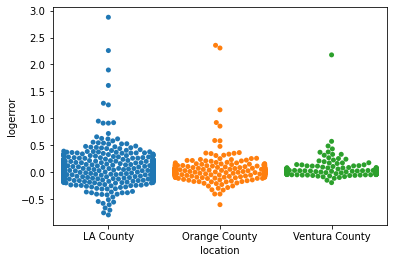

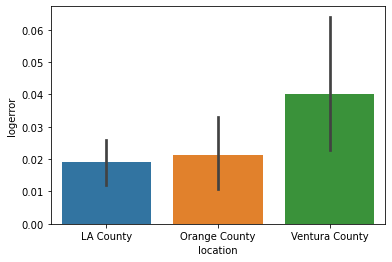

In [11]:
# Calling explore.py; applying plot function to 'location' and 'logerror'
explore.plot_categorical_and_continuous_vars(train, 'location', 'logerror')

In [12]:
# Assigning separate dfs to select only values within a certain county code
Orange = train[train.location == 'Orange County'].logerror
LA = train[train.location == 'LA County'].logerror
Ventura = train[train.location == 'Ventura County'].logerror

In [13]:
# ANOVA test for comparing 3 separate cat vars
f, p = stats.f_oneway(Orange, LA, Ventura)
f, p

print(f'f-statistic by ANOVA Test: {f}, p-value: {p}')

# set alpha : 0.05
if p < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

f-statistic by ANOVA Test: 11.01573329874872, p-value: 1.6514954460181095e-05
We can reject the null hypothesis


#### Answer 4: Yes, location by county does affect logerror
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the logerror for each county are NOT equal. Thus we move forward with this feature.

-----------------------------------------------------------------------------------------------------------
### Summary: Which are the best predictors of log error?

#### Key Takeaways
##### All 4 features I explored have been shown to have correlation with log error, thus I'll move forward with these features to modeling:
- `bedrooms` 
- `bathrooms` 
- `garage_spaces` 
- `location` (aka `county_encoded` for modeling)

##### I will now implement these features within my clustering exploration and analysis

-----------------------------------------------------------------------------------------------------------
## Clustering Questions

#### 1. Does bedroom, bathroom, and garage space count affect log error?
    Results: 
        - garage space count is replaced with age of a home
        - Clustering is deemed to be potentially effective
    

#### 2.  Does location, latitude, and longitude affect log error?
    Results: 
        - Clustering is deemed to be potentially effective

#### 3. Do sqft, lot_sq_ft, and bath_bed_ratio affect log error?
    Results: 
        - Clustering is NOT deemed to be potentially effective

-----------------------------------------------------------------------------------------------------------
Below, we will investigate these three potential clusters, producing visualizations and performing statistical tests in order to determine viability of creating these clusters for modeling.

### 1. Does bedroom, bathroom, and garage space count affect log error?
**Note** \
garage spaces will be dropped as a feature and home age (`age`) will be substituted

#### a. Is there a relationship between bedroom count and logerror?

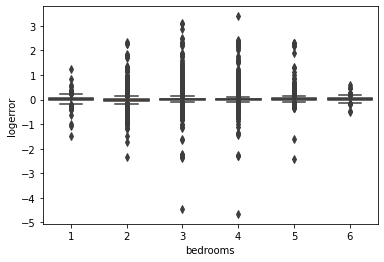

In [14]:
# Boxplot expressing potential correlation with logerror
sns.boxplot(data=train, y='logerror', x='bedrooms')
plt.show()

In [15]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.bedrooms <= 3].logerror,
    train[train.bedrooms > 3].logerror,
)

LeveneResult(statistic=10.720146169682682, pvalue=0.001061085210039708)

**Conclusion:** \
Our p-value is less than our alpha, so we reject the null hypothesis that the variance in logerror is the same for bedrooms counts above and below 3.

(ie.e the variance is not equal)

In [16]:
# one sample t-test evaluating correlation with logerror
stats.ttest_ind(
    train[train.bedrooms <= 3].logerror,
    train[train.bedrooms > 3].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-5.401583561154031, pvalue=6.685407679258316e-08)

**Conclusion:** \
We reject the null hypothesis that the average logerror for 3 or less bedrooms is the same as the average logerror for 4 or more bedrooms.

#### b. Is there a relationship between bathroom count and logerror?

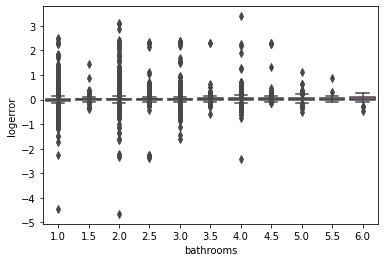

In [17]:
# Boxplot expressing potential correlation with logerror
sns.boxplot(data=train, y='logerror', x='bathrooms')
plt.show()

In [18]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.bathrooms <= 3.5].logerror,
    train[train.bathrooms > 3.5].logerror,
)

LeveneResult(statistic=16.3784151915, pvalue=5.2016901629995204e-05)

**Conclusion:** \
Our p-value is more than our alpha, so we fail to reject the null hypothesis that the variance in logerror is the same for bedrooms counts above and below 3.

(ie.e the variance is equal)

In [19]:
# one sample t-test evaluating correlation with logerror
stats.ttest_ind(
    train[train.bathrooms <= 3.5].logerror,
    train[train.bathrooms > 3.5].logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-5.8483328474701235, pvalue=5.022374162776277e-09)

**Conclusion:** \
We reject the null hypothesis that the average logerror for 3.5 or less bathrooms is the same as the average logerror for 4 or more bathrooms.

#### c. Is there a relationship between garage space count and logerror?

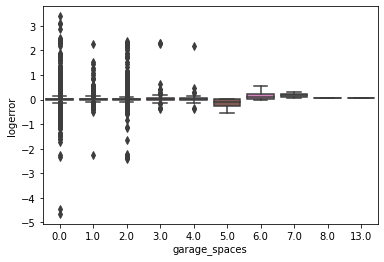

In [20]:
# Boxplot expressing potential correlation with logerror
sns.boxplot(data=train, y='logerror', x='garage_spaces')
plt.show()

In [21]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.garage_spaces <= 4].logerror,
    train[train.garage_spaces > 4].logerror,
)

LeveneResult(statistic=5.541990701777045, pvalue=0.018572570342954117)

**Conclusion:** \
Our p-value is less than our alpha, so we reject the null hypothesis that the variance in logerror is the same for garage space counts above and below 4.

(ie.e the variance is not equal)

In [22]:
# one sample t-test evaluating correlation with logerror
stats.ttest_ind(
    train[train.garage_spaces <= 4].logerror,
    train[train.garage_spaces > 4].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=0.31589171474565314, pvalue=0.7564351562339428)

**Conclusion:** \
We fail to reject the null hypothesis that the average logerror for 4 or less garage spaces is the same as the average logerror for 4 or more garage spaces.

#### d. Is there a relationship between age of a home and logerror?

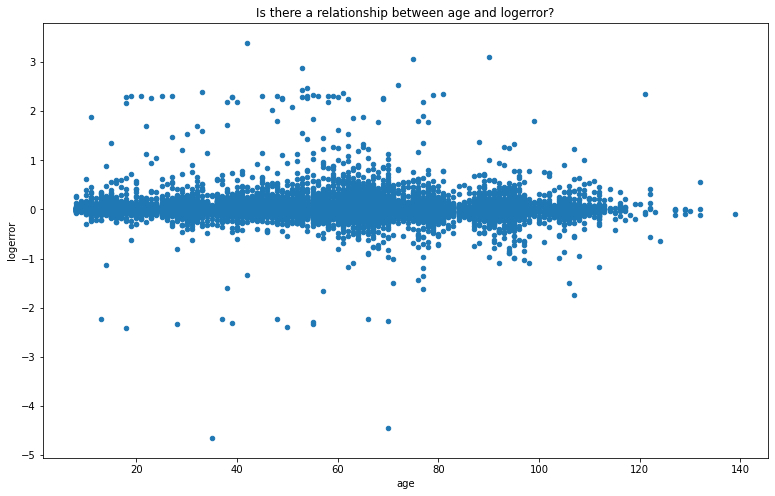

In [23]:
# Scatterplot expressing potential correlation with logerror
train.plot.scatter(y='logerror', x='age', title='Is there a relationship between age and logerror?', figsize=(13, 8))
plt.show()

**Takeaways:** \
It appears there could be a significant relationship between count of bedrooms and bathrooms, and logerror when controlling for age of a home. 

### 2.  Does location (county_encoded), latitude, and longitude affect log error?

#### a. Is there a relationship between latitude and logerror?

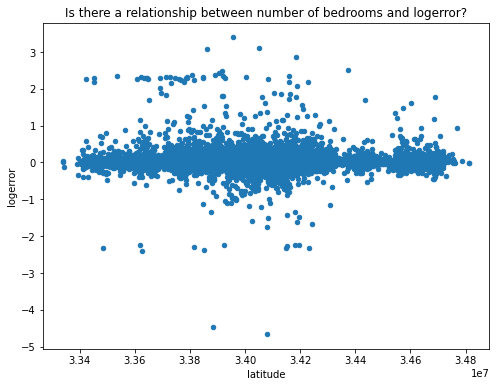

In [24]:
# Scatterplot expressing potential correlation with logerror
train.plot.scatter(
    x="latitude",
    y="logerror",
    title='Is there a relationship between number of bedrooms and logerror?',
    figsize=(8, 6),
)
plt.show()

#### b. If we control for location (county), is there a different/ better relationship between latitude and logerror?

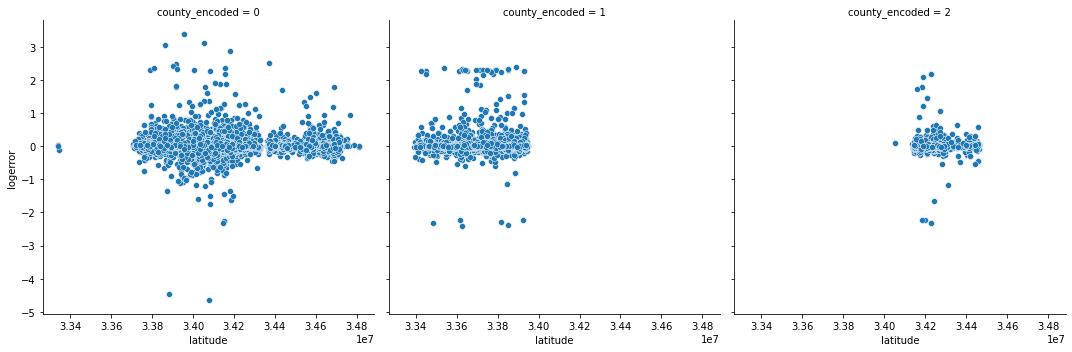

In [25]:
# Relplot expressing potential correlation with logerror
sns.relplot(data=train, y='logerror', x='latitude', col='county_encoded')

#### c. Is there a relationship between longitude and logerror?

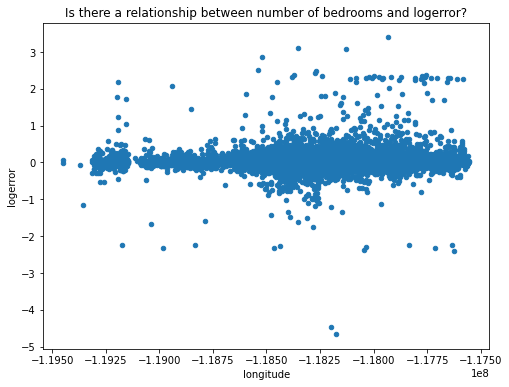

In [26]:
# Scatterplot expressing potential correlation with logerror
train.plot.scatter(
    x="longitude",
    y="logerror",
    title='Is there a relationship between number of bedrooms and logerror?',
    figsize=(8, 6),
)
plt.show()

#### b. If we control for location (county), is there a different/ better relationship between longitude and logerror?

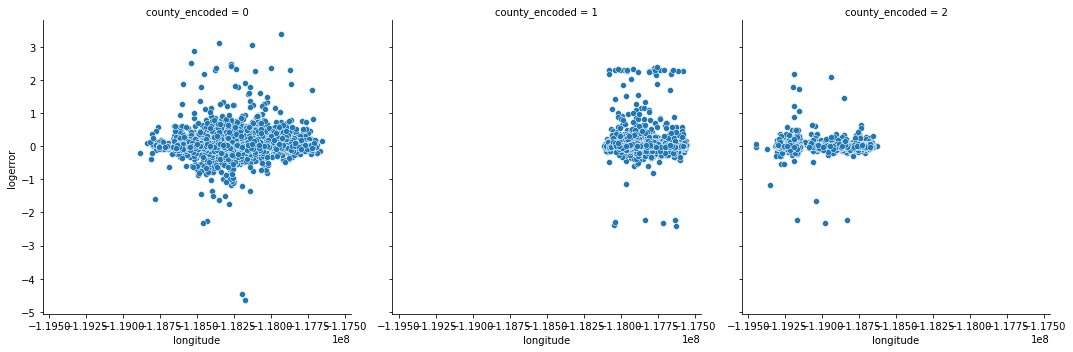

In [27]:
# Relplot expressing potential correlation with logerror
sns.relplot(data=train, y='logerror', x='longitude', col='county_encoded')

**Takeaways:** \
It appears there could be a significant relationship between latitude, longitude, and logerror when controlling for location by county.

### 3. Do sqft, lot_sq_ft, and bath_bed_ratio affect log error?

#### a. Is there a relationship between sqft and logerror?

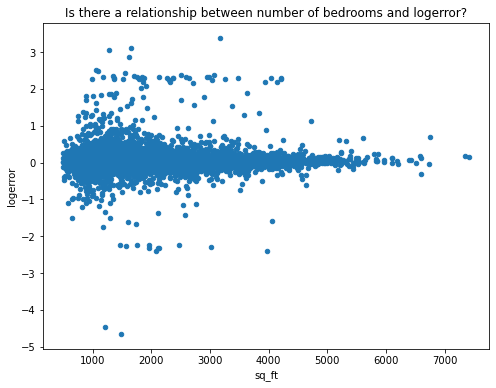

In [28]:
# Scatterplot expressing potential correlation with logerror
train.plot.scatter(
    x="sq_ft",
    y="logerror",
    title='Is there a relationship between number of bedrooms and logerror?',
    figsize=(8, 6),
)
plt.show()

#### b. Is there a relationship between lot_sq_ft and logerror?

In [31]:
train.lot_sq_ft.describe()

count              27,020.00
mean                9,573.33
std                20,092.40
min                   800.00
25%                 5,606.00
50%                 6,807.00
75%                 8,563.00
max               672,149.00
Name: lot_sq_ft, dtype: float64

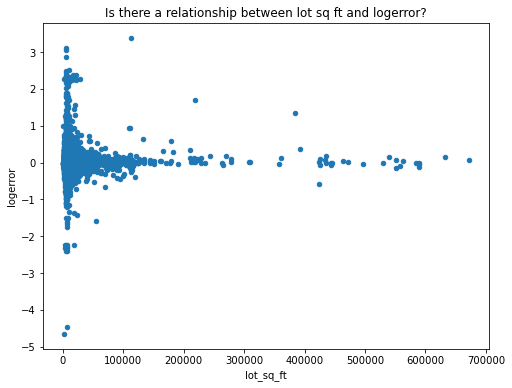

In [32]:
# Scatterplot expressing potential correlation with logerror
train.plot.scatter(
    x="lot_sq_ft",
    y="logerror",
    title='Is there a relationship between lot sq ft and logerror?',
    figsize=(8, 6),
)
plt.show()

#### c. Is there a relationship between bath_bed_ratio and logerror?

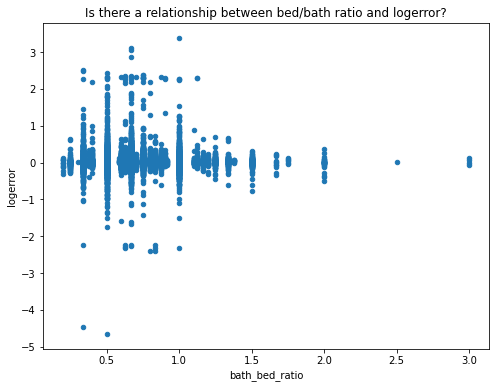

In [33]:
# Scatterplot expressing potential correlation with logerror
train.plot.scatter(
    x="bath_bed_ratio",
    y="logerror",
    title='Is there a relationship between bed/bath ratio and logerror?',
    figsize=(8, 6),
)
plt.show()

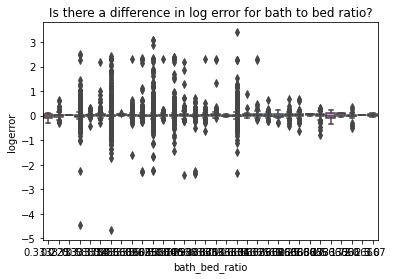

In [34]:
# Boxplot expressing potential correlation with logerror
sns.boxplot(data=train, y='logerror', x='bath_bed_ratio')
plt.title("Is there a difference in log error for bath to bed ratio?")
plt.show()

**Takeaways:** \
It appears there is not a significant relationship between home square feet, lot square feet, bath to bed ratio, and the log error.

-----------------------------------------------------------------------------------------------------------
### Summary: Which clusters could be predictors of log error?
#### Key Takeaways
##### My first 2 clusters appear to have potential correlation with log error:
- Cluster 1: bedrooms, bathrooms, and age of a home (binned)
- Cluster 2: latitude, longitude, and location by county

##### My last cluster did NOT appear to have potential correlation with log error:
- Cluster 3: sqft, lot sqft, and bath to bed ratio

##### I will now create these clusters and assess them once created

-----------------------------------------------------------------------------------------------------------
### Scaling

Features to scale:
1. bedrooms
2. bathrooms
3. garage_spaces
4. latitude
5. longitude
6. sqft
7. lot_sq_ft

In [35]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test)

**Splitting train, validate, and test dfs on x and y FOR SCALED DF will occur AFTER clustering**

-----------------------------------------------------------------------------------------------------------
## Creating Clusters

#### Cluster 1: bedrooms, bathrooms, and age of a home

In [36]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms', 'bathrooms', 'age_bin']
cluster_name = 'home_space_cluster'
k_range = range(2,20)

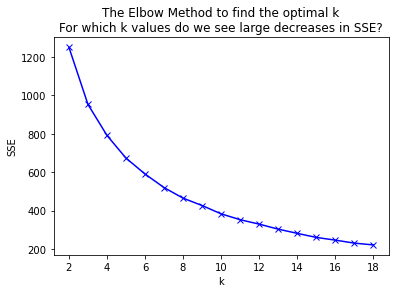

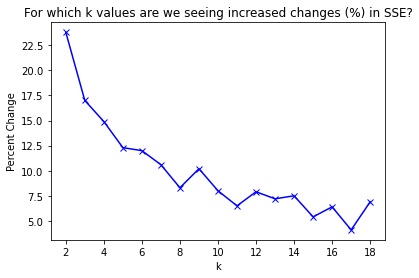

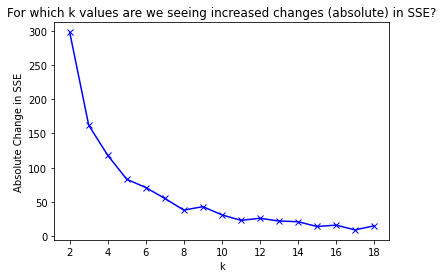

,k,sse,delta,pct_delta
0,2,"1,250.56",298.00,23.80
1,3,952.84,162.00,17.00
2,4,791.26,118.00,14.90
3,5,673.01,83.00,12.30
4,6,590.31,71.00,12.00
5,7,519.53,55.00,10.60
6,8,464.50,38.00,8.30
7,9,426.02,43.00,10.20
8,10,382.76,31.00,8.00
9,11,352.16,23.00,6.50


In [37]:
# Calling `find_k` function from model.py
model.find_k(train_scaled, cluster_vars, k_range)

In [38]:
# create kmean object
kmeans = KMeans(n_clusters=5, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(train_scaled[cluster_vars])

# predict on train, validate, and test
cluster1 = kmeans.predict(train_scaled[cluster_vars])
v_cluster1 = kmeans.predict(validate_scaled[cluster_vars])
t_cluster1 = kmeans.predict(test_scaled[cluster_vars])
cluster1

array([2, 2, 2, ..., 1, 4, 4], dtype=int32)

In [39]:
# Assign new column to cluster
train_scaled['area_cluster'] = cluster1
validate_scaled['area_cluster'] = v_cluster1
test_scaled['area_cluster'] = t_cluster1

In [40]:
# Create dummy vars for area cluster
pd.get_dummies(train_scaled['area_cluster'], prefix= 'area', drop_first=False)
pd.get_dummies(validate_scaled['area_cluster'], prefix= 'area', drop_first=False)
pd.get_dummies(test_scaled['area_cluster'], prefix= 'area', drop_first=False)


,area_0,area_1,area_2,area_3,area_4
9190,0,1,0,0,0
21387,0,0,1,0,0
2284,0,0,1,0,0
17823,0,0,1,0,0
22903,0,0,1,0,0
...,...,...,...,...,...
8142,1,0,0,0,0
23275,0,0,1,0,0
34622,0,0,1,0,0
21853,1,0,0,0,0


<AxesSubplot:xlabel='area_cluster', ylabel='logerror'>

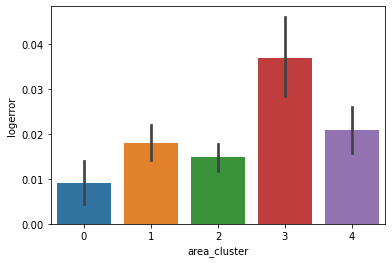

In [41]:
# Visualize the cluster
plt.show()
sns.barplot(data=train_scaled, x='area_cluster', y='logerror')

**Takeaways:** \
Cluster does seem to successfully differentiate data using these features. \
Thus we will us this cluster for our modeling.

#### Cluster 2: location, latitude, longitude

In [42]:
# list of variables I will cluster on. 
cluster_vars = ['county_encoded', 'latitude', 'longitude']
cluster_name = 'location_cluster'
k_range = range(2,20)

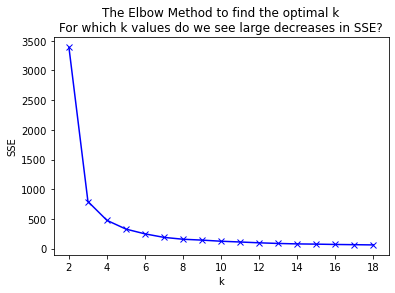

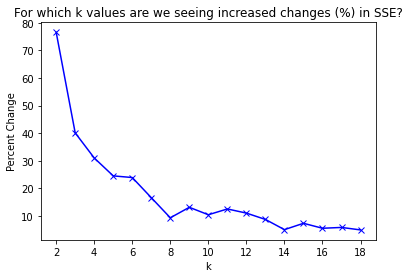

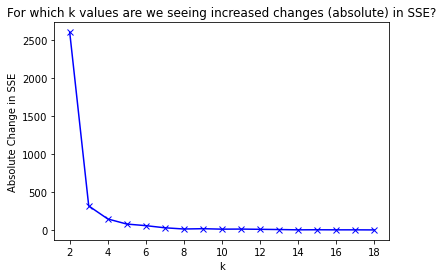

,k,sse,delta,pct_delta
0,2,"3,391.61","2,599.00",76.60
1,3,792.81,318.00,40.10
2,4,475.21,147.00,31.00
3,5,328.06,80.00,24.50
4,6,247.70,59.00,23.90
5,7,188.57,31.00,16.60
6,8,157.23,15.00,9.30
7,9,142.57,19.00,13.10
8,10,123.84,13.00,10.40
9,11,110.90,14.00,12.50


In [43]:
# Calling `find_k` function from model.py
model.find_k(train_scaled, cluster_vars, k_range)

In [44]:
# create kmean object
kmeans = KMeans(n_clusters=5, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(train_scaled[cluster_vars])

# predict on train, validate, and test
cluster2 = kmeans.predict(train_scaled[cluster_vars])
v_cluster2 = kmeans.predict(validate_scaled[cluster_vars])
t_cluster2 = kmeans.predict(test_scaled[cluster_vars])
cluster2

array([2, 3, 4, ..., 0, 3, 3], dtype=int32)

In [45]:
# Assign new column to cluster
train_scaled['location_cluster'] = cluster2
validate_scaled['location_cluster'] = v_cluster2
test_scaled['location_cluster'] = t_cluster2

In [46]:
# Create dummy vars for location cluster
pd.get_dummies(train_scaled['location_cluster'], prefix= 'location', drop_first=False)
pd.get_dummies(validate_scaled['location_cluster'], prefix= 'location', drop_first=False)
pd.get_dummies(test_scaled['location_cluster'], prefix= 'location', drop_first=False)


,location_0,location_1,location_2,location_3,location_4
9190,0,1,0,0,0
21387,0,0,0,1,0
2284,0,1,0,0,0
17823,0,0,0,0,1
22903,0,0,0,1,0
...,...,...,...,...,...
8142,0,0,0,1,0
23275,0,0,0,1,0
34622,0,0,0,1,0
21853,0,0,0,1,0


In [47]:
train_scaled.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin,area_cluster,location_cluster
17293,-0.00,2017-04-12,0.30,0.40,0.27,"2,335.00",Ventura County,2.00,0.08,0.00,...,60s,2,54,2,0.83,Ventura,"(60590423105000.0, 483030105084015.0]",0.40,2,2
50005,0.03,2017-09-06,0.20,0.40,0.12,"1,361.00",LA County,2.00,0.00,0.00,...,50s,0,66,0,0.67,LA,"(60374016031004.0, 60376025042001.0]",0.47,2,3
35083,0.07,2017-06-29,0.40,0.20,0.14,"1,497.00",LA County,3.00,0.00,0.00,...,50s,0,62,0,1.50,LA,"(60371011101000.0, 60374016031004.0]",0.47,2,4
18080,0.13,2017-04-17,0.20,0.60,0.13,"1,430.00",LA County,2.00,0.00,0.00,...,60s,0,56,0,0.50,LA,"(60371011101000.0, 60374016031004.0]",0.40,4,3
9668,-0.09,2017-03-03,0.20,0.20,0.15,"1,570.00",LA County,2.00,0.00,0.00,...,40s,0,71,0,1.00,LA,"(60371011101000.0, 60374016031004.0]",0.53,0,4


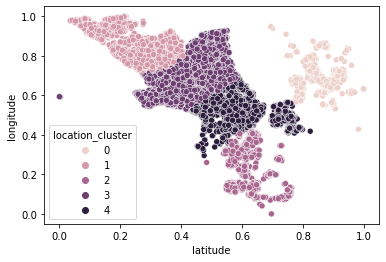

<AxesSubplot:xlabel='location_cluster', ylabel='logerror'>

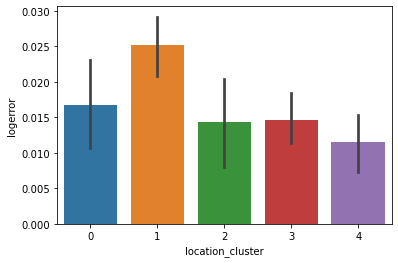

In [48]:
# visualize the cluster
sns.scatterplot(data=train_scaled, y = 'longitude', x = 'latitude', hue= 'location_cluster')
plt.show()
sns.barplot(data=train_scaled, x='location_cluster', y='logerror')

**Takeaways:** \
Cluster does seem to successfully differentiate data using these features. \
Thus we will us this cluster for our modeling.

#### Cluster 3: sqft, lot_sq_ft, bath_bed_ratio

In [49]:
# list of variables I will cluster on. 
cluster_vars = ['sq_ft', 'lot_sq_ft', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)

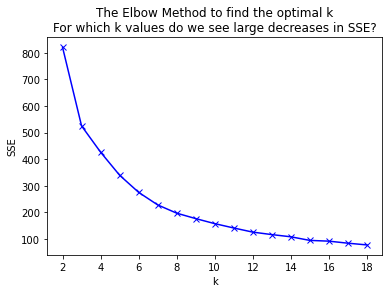

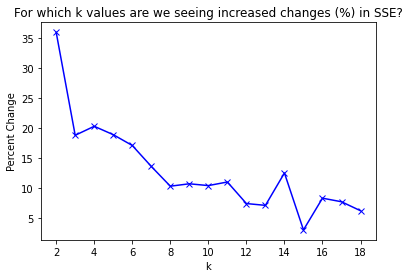

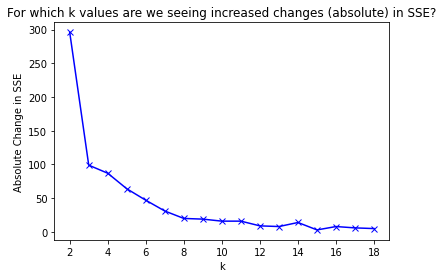

,k,sse,delta,pct_delta
0,2,820.84,296.00,36.00
1,3,525.17,99.00,18.80
2,4,426.47,87.00,20.30
3,5,339.81,64.00,18.90
4,6,275.46,47.00,17.10
5,7,228.33,31.00,13.60
6,8,197.21,20.00,10.30
7,9,176.81,19.00,10.70
8,10,157.86,16.00,10.40
9,11,141.50,16.00,11.00


In [50]:
# Calling `find_k` function from model.py
model.find_k(train_scaled, cluster_vars, k_range)

In [51]:
# create kmean object
kmeans = KMeans(n_clusters=3, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(train_scaled[cluster_vars])

# predict on train, validate, and test
cluster3 = kmeans.predict(train_scaled[cluster_vars])
v_cluster3 = kmeans.predict(validate_scaled[cluster_vars])
t_cluster3 = kmeans.predict(test_scaled[cluster_vars])
cluster3

array([2, 2, 0, ..., 2, 1, 1], dtype=int32)

In [52]:
# Assign new column to cluster
train_scaled['size_cluster'] = cluster3

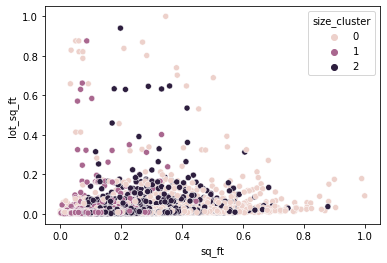

<AxesSubplot:xlabel='size_cluster', ylabel='logerror'>

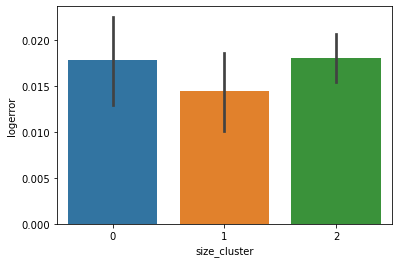

In [53]:
# visualize the cluster
sns.scatterplot(data=train_scaled, y = 'lot_sq_ft', x = 'sq_ft', hue= 'size_cluster')
plt.show()
sns.barplot(data=train_scaled, x='size_cluster', y='logerror')

**Takeaways:** \
Cluster doesn't seem to show any effectiveness at successfully clustering these features. \
Thus we will drop this cluster from our modeling.

In [54]:
# Dropping `size_cluster` as a feature
train_scaled = train_scaled.drop(columns = ['size_cluster'])
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  float64 
 4   sq_ft                       27020 non-null  float64 
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

-----------------------------------------------------------------------------------------------------------
## Predicting Log Error (Modeling)
In fitting and evaluating models on our data, the metric we choose to use to evaluate is root mean square error (RMSE). This allows us to compare the mean error of a model in the actual unit of our target variable, logerror. Thus, this is the most valuable metric for understanding the performance of our models.


**Note:** \
At this stage we will:
- Drop extraneous features no longer relevant to modeling
- Split scaled train, validate, and test dfs on x and y, now with appropriate clusters

In [55]:
# Dropping extraneous features no longer relevant to modeling
train_scaled = train_scaled.drop(columns = ['location', 'decade_built', 'transactiondate', 'finishedsquarefeet12', 'full_bathrooms', 'garagetotalsqft', 'poolcnt', 'propertycountylandusecode', 'regionidcity', 'regionidzip', 'roomcnt', 'year_built', 'structuretaxvaluedollarcnt', 'censustractandblock', 'censustract_bin', 'census_county_bin', 'census_quarter_bin'])
validate_scaled = validate_scaled.drop(columns = ['location', 'decade_built', 'transactiondate', 'finishedsquarefeet12', 'full_bathrooms', 'garagetotalsqft', 'poolcnt', 'propertycountylandusecode', 'regionidcity', 'regionidzip', 'roomcnt', 'year_built', 'structuretaxvaluedollarcnt', 'censustractandblock', 'censustract_bin', 'census_county_bin', 'census_quarter_bin'])
test_scaled = test_scaled.drop(columns = ['location', 'decade_built', 'transactiondate', 'finishedsquarefeet12', 'full_bathrooms', 'garagetotalsqft', 'poolcnt', 'propertycountylandusecode', 'regionidcity', 'regionidzip', 'roomcnt', 'year_built', 'structuretaxvaluedollarcnt', 'censustractandblock', 'censustract_bin', 'census_county_bin', 'census_quarter_bin'])

In [56]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   logerror               27020 non-null  float64 
 1   bathrooms              27020 non-null  float64 
 2   bedrooms               27020 non-null  float64 
 3   sq_ft                  27020 non-null  float64 
 4   garage_spaces          27020 non-null  float64 
 5   latitude               27020 non-null  float64 
 6   longitude              27020 non-null  float64 
 7   lot_sq_ft              27020 non-null  float64 
 8   unitcnt                27020 non-null  float64 
 9   home_value             27020 non-null  int64   
 10  landtaxvaluedollarcnt  27020 non-null  float64 
 11  county_encoded         27020 non-null  int64   
 12  age                    27020 non-null  int64   
 13  bath_bed_ratio         27020 non-null  float64 
 14  age_bin                27020 non-nu

In [57]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF with clusters
x_train_scaled = train_scaled.drop(columns=['logerror'])
x_validate_scaled = validate_scaled.drop(columns=['logerror'])
x_test_scaled = test_scaled.drop(columns=['logerror'])

y_train_scaled = train_scaled['logerror']
y_validate_scaled = validate_scaled['logerror']
y_test_scaled = test_scaled['logerror']

In [58]:
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bathrooms              27020 non-null  float64 
 1   bedrooms               27020 non-null  float64 
 2   sq_ft                  27020 non-null  float64 
 3   garage_spaces          27020 non-null  float64 
 4   latitude               27020 non-null  float64 
 5   longitude              27020 non-null  float64 
 6   lot_sq_ft              27020 non-null  float64 
 7   unitcnt                27020 non-null  float64 
 8   home_value             27020 non-null  int64   
 9   landtaxvaluedollarcnt  27020 non-null  float64 
 10  county_encoded         27020 non-null  int64   
 11  age                    27020 non-null  int64   
 12  bath_bed_ratio         27020 non-null  float64 
 13  age_bin                27020 non-null  category
 14  area_cluster           27020 non-nu

In [59]:
x_validate_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11580 entries, 11130 to 6439
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bathrooms              11580 non-null  float64 
 1   bedrooms               11580 non-null  float64 
 2   sq_ft                  11580 non-null  float64 
 3   garage_spaces          11580 non-null  float64 
 4   latitude               11580 non-null  float64 
 5   longitude              11580 non-null  float64 
 6   lot_sq_ft              11580 non-null  float64 
 7   unitcnt                11580 non-null  float64 
 8   home_value             11580 non-null  int64   
 9   landtaxvaluedollarcnt  11580 non-null  float64 
 10  county_encoded         11580 non-null  int64   
 11  age                    11580 non-null  int64   
 12  bath_bed_ratio         11580 non-null  float64 
 13  age_bin                11580 non-null  category
 14  area_cluster           11580 non-nu

#### Baseline
In order to compare our models, I'll create a baseline from our train dataset actual home values

In [60]:
from math import sqrt

#Establish baselines for the train and validation datasets
baseline = train['logerror'].mean()

# Create new columns for baseline
train['baseline'] = baseline
validate['baseline'] = baseline
test['baseline'] = baseline

# Find RMSE for each sample
train_rmse = sqrt(mean_squared_error(train['logerror'], train.baseline))
validate_rmse = sqrt(mean_squared_error(validate['logerror'], validate.baseline))
test_rmse = sqrt(mean_squared_error(test['logerror'], test.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))
print('Test baseline RMSE: {}.'.format(test_rmse))

Train baseline RMSE: 0.1728486123962576.
Validation baseline RMSE: 0.15816323605423355.
Test baseline RMSE: 0.1690605664013077.


I'll now create:
- `train_predictions` df for our train predictions 
- `predictions` df for our validate predictions

In [61]:
# Creating dfs for train and validate predictions
train_predictions = pd.DataFrame({
    'actual': train['logerror'],
    'baseline': baseline
}) 

predictions = pd.DataFrame({
    'actual': validate['logerror'],
    'baseline': baseline
}) 

-----------------------------------------------------------------------------------------------------------
### Fit 3 Best Models
- Linear Regression (`simple_lm`)
- Lasso-Lars Regression (`lasso_lars`)
- TweediRegressor (`glm`)

#### Fitting Linear Regression

In [62]:
# Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predicting on train and validate and adding column to both predictions dfs 
train_predictions['simple_lm'] = lm.predict(x_train_scaled)
predictions['simple_lm'] = lm.predict(x_validate_scaled)

#### Fitting Lasso-Lars Regression

In [63]:
# Create the model object
lars = LassoLars(alpha=1)

# Fit the model to our training data
lars.fit(x_train_scaled, y_train_scaled)

# predict train
train_predictions['lasso_lars'] = lars.predict(x_train_scaled)

# Predict validate
predictions['lasso_lars'] = lars.predict(x_validate_scaled)

#### Fitting TweediRegressor

In [64]:
# Create the model object
glm = TweedieRegressor(power=0, alpha=1)

# Fit the model to our training data
glm.fit(x_train_scaled, y_train_scaled)

# predict train, add to df
train_predictions['glm'] = glm.predict(x_train_scaled)

# Predict validate, add to df
predictions['glm'] = glm.predict(x_validate_scaled)

#### Evaluating Models using root mean squared error (RMSE)

In [65]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(train_predictions.actual, y_predicted))

print('Train baseline RMSE: {}.'.format(train_rmse))
train_predictions.apply(calculate_rmse).sort_values()

Train baseline RMSE: 0.1728486123962576.


actual                       0.00
simple_lm                    0.17
glm                          0.17
baseline                     0.17
lasso_lars                   0.17
dtype: float64

In [66]:
# Calculate root mean squared error (RMSE) for every column in the predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions.actual, y_predicted))

print('Validation baseline RMSE: {}.'.format(validate_rmse))
predictions.apply(calculate_rmse).sort_values()

Validation baseline RMSE: 0.15816323605423355.


actual                       0.00
baseline                     0.16
lasso_lars                   0.16
simple_lm                    0.16
glm                          0.16
dtype: float64

##### Model Conclusion: 
Based on comparing our train and validate predictions, we can say with confidence that Linear Regression (`simple_lm`) is our best performing model. We will now predict and evaluate this model on our test dataset

-----------------------------------------------------------------------------------------------------------
### Predict and Evaluate Test dataset
Like with train and validate, I'll create a predictions df to collect predictions and then evaluate.

In [67]:
test_predictions = pd.DataFrame({
    'actual': test['logerror'],
    'baseline': baseline
}) 

In [68]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predict on test
test_predictions['simple_lm'] = lm.predict(x_test_scaled)

test_predictions.head()

,actual,baseline,simple_lm
9190,-0.02,0.02,0.01
21387,-0.00,0.02,0.01
2284,0.16,0.02,0.03
17823,-0.03,0.02,0.01
22903,-0.00,0.02,0.01


In [69]:
# Calculate root mean squared error (RMSE) for the test_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(test_predictions.actual, y_predicted))

print('Test baseline RMSE: {}.'.format(test_rmse))
test_predictions.apply(calculate_rmse).sort_values()

Test baseline RMSE: 0.1690605664013077.


actual                      0.00
simple_lm                   0.17
baseline                    0.17
dtype: float64

In [70]:
test_result = test_predictions.apply(calculate_rmse).sort_values()

In [71]:
# Finding by how much my model beat baseline 
model_percent = abs((test_result['simple_lm'] - test_rmse) / ((test_result['simple_lm'] + test_rmse) / 2))

print("The model beat baseline by: "+"{:.2%}".format(model_percent))

The model beat baseline by: 0.14%


**Success!** \
From this calculation on our test dataset, we can observe that my Linear Regression model technically beat our baseline.

**Our model performs 0.14% better than baseline**

-----------------------------------------------------------------------------------------------------------
### Summary

In seeking solutions to more accurately predict log error for Zillow, we have explored a multiplicity of factors in the dataset that affect log error. We have shown that some potential primary drivers of log error are :

- The number of bedrooms in a home
- The number of bathrooms in a home 
- The number of garage spaces in a home
- The location of a home by county
- The square footage of a home

In addition to these more self-evident factors, we have created meaningful clusters using Kmeans in order to create better predictions. These clusters include:

- The number of bedrooms and bathrooms, and the age of a home
- Latitude, longitude, and location by county

The correlation of these features and our newly created clusters with log error, combined within our analysis and models, expresses confidence in the validity of our findings. We have created models that perform slightly better than our baseline of 0.169.

Having fit the best performing model to our train, validate, and test datasets, we expect this model to perform 0.14% better than our baseline in the future on data it has not seen, given no major changes to our data source.

### Recommendations

There are a number of recommendations that can be offered based on the above analysis. These suggestions are tied to the relative lack in performance within our primary drivers and clusters when predicting logerror:

1. I recommend that Zillow considers collecting more data on location-driven features such as proximity of local schools, emergency services such as police and fire stations, and local parks and recreational areas.
2. Based on our exploration of clusters that affect log error, I recommend Zillow further investigate and extrapolate on clustering techniques in order to better predict log error.

### Next Steps

Considering the overall lack in effectiveness of our best-performing model, there is certainly room for improvement and optimization. \
If given more time to pursue a better results, I would begin by conducting further exploration and analysis of the clusters I created for our dataset. This could include:
- Exploring census data further in order to better identify specific neighborhoods instead of simply analyzing at the county level.
- Re-calibrating my cluster based on home size by exploring more appropriate features to include.

By optimizing our dataset to include the above categories, I believe we could increase the correlation of our feature set with log error and improve model prediction accuracy.